In [36]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/nikitacarolyn/Desktop/DelhiTest.csv", index_col='Date',parse_dates=True)

In [38]:
print('Shape of data', data.shape)
data.head()

Shape of data (2192, 8)


,City,Year,Month,Day,Avg temp,Min temp,Max temp,Precipitation
Date,,,,,,,,
2015-01-01,Delhi,2015,1,1,14.9,8.8,21.6,NaN
2015-01-02,Delhi,2015,1,2,14.7,10.2,21.6,5.1
2015-01-03,Delhi,2015,1,3,15.0,NaN,16.8,7.1
2015-01-04,Delhi,2015,1,4,14.2,NaN,19.0,0.0
2015-01-05,Delhi,2015,1,5,13.9,7.8,20.7,NaN


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2015-01-01 to 2020-12-31
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           2192 non-null   object 
 1   Year           2192 non-null   int64  
 2   Month          2192 non-null   int64  
 3   Day            2192 non-null   int64  
 4   Avg temp       2192 non-null   float64
 5   Min temp       2141 non-null   float64
 6   Max temp       2173 non-null   float64
 7   Precipitation  618 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 154.1+ KB


In [40]:
data.isnull().sum()

City                0
Year                0
Month               0
Day                 0
Avg temp            0
Min temp           51
Max temp           19
Precipitation    1574
dtype: int64

In [41]:
df1=data.interpolate()
df1

,City,Year,Month,Day,Avg temp,Min temp,Max temp,Precipitation
Date,,,,,,,,
2015-01-01,Delhi,2015,1,1,14.9,8.8,21.6,NaN
2015-01-02,Delhi,2015,1,2,14.7,10.2,21.6,5.10
2015-01-03,Delhi,2015,1,3,15.0,9.4,16.8,7.10
2015-01-04,Delhi,2015,1,4,14.2,8.6,19.0,0.00
2015-01-05,Delhi,2015,1,5,13.9,7.8,20.7,0.05
...,...,...,...,...,...,...,...,...
2020-12-27,Delhi,2020,12,27,15.0,6.0,21.9,0.00
2020-12-28,Delhi,2020,12,28,11.8,5.6,22.6,0.00
2020-12-29,Delhi,2020,12,29,10.8,3.6,20.9,0.00


In [42]:
df=df1.fillna(0)

In [43]:
df.isnull().sum()

City             0
Year             0
Month            0
Day              0
Avg temp         0
Min temp         0
Max temp         0
Precipitation    0
dtype: int64

In [44]:
df.duplicated().sum()

0

In [45]:
df.describe()

,Year,Month,Day,Avg temp,Min temp,Max temp,Precipitation
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,2017.500456,6.521898,15.732664,25.701870,19.137500,32.607345,2.747765
std,1.708571,3.449773,8.803378,7.349226,7.739671,6.845108,8.134831
min,2015.000000,1.000000,1.000000,6.900000,0.700000,12.900000,0.000000
25%,2016.000000,4.000000,8.000000,19.300000,12.000000,27.400000,0.000000
50%,2017.500000,7.000000,16.000000,28.000000,20.800000,34.500000,0.109698
75%,2019.000000,10.000000,23.000000,31.600000,26.100000,37.300000,1.579372
max,2020.000000,12.000000,31.000000,39.800000,34.000000,48.100000,99.300000


## EDA

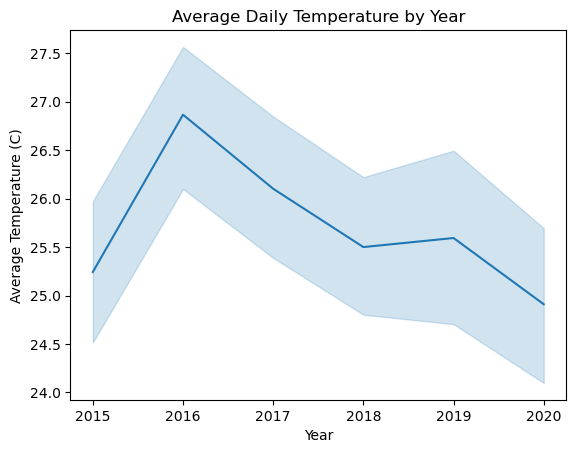

In [46]:
sns.lineplot(data=df,x="Year",y="Avg temp")
plt.xlabel('Year')
plt.ylabel('Average Temperature (C)')
plt.title('Average Daily Temperature by Year')
plt.show()

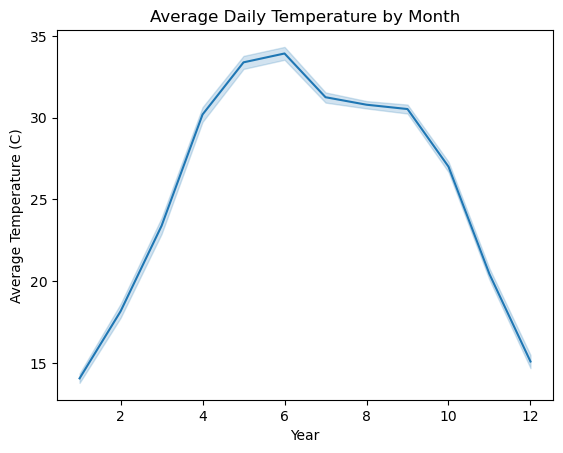

In [47]:
sns.lineplot(data=df,x="Month",y="Avg temp")
plt.xlabel('Year')
plt.ylabel('Average Temperature (C)')
plt.title('Average Daily Temperature by Month')
plt.show()

/var/folders/l1/5ptdcyqx41q753f04b_91cq40000gn/T/ipykernel_54816/673814514.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  Ddata = Month_df.pivot('Year','Month','Avg temp')


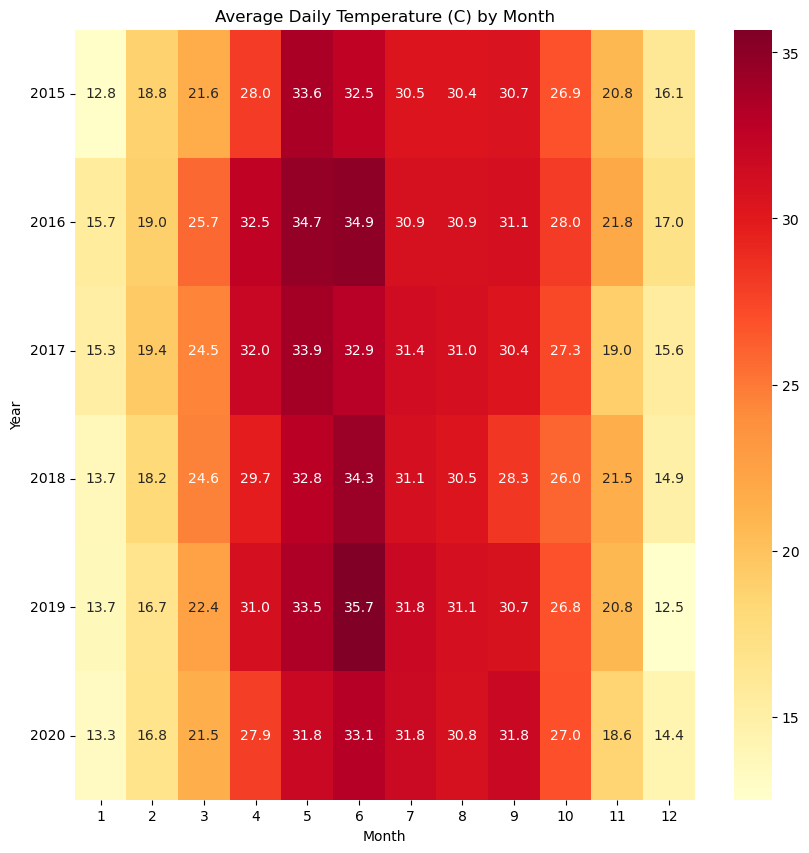

In [48]:
df['Year'] = df.index.year
df['Month'] = df.index.month

Month_df = df.groupby(['Year','Month'], as_index=False)['Avg temp'].mean()

Ddata = Month_df.pivot('Year','Month','Avg temp')

plt.subplots(figsize=(10,10))
sns.heatmap(Ddata, cmap='YlOrRd',annot=True, fmt='.1f')
plt.title('Average Daily Temperature (C) by Month')
plt.yticks(rotation=0)
plt.show()

In [62]:
correlation=df.corr()

/var/folders/l1/5ptdcyqx41q753f04b_91cq40000gn/T/ipykernel_54816/1332955121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


## Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [50]:
X=df.drop(['City','Month','Day','Avg temp','Min temp','Max temp','Precipitation'],axis=1)
y=df['Avg temp']

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [56]:
model=LinearRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print(prediction[:10],y_test[:10])
print(mean_squared_error(y_test,prediction))

[25.3729061  25.3729061  25.54692426 25.89496058 25.72094242 25.54692426
 26.06897873 25.89496058 26.24299689 26.24299689] Date
2020-12-23    12.8
2020-09-07    29.7
2019-09-26    29.7
2017-11-26    16.9
2018-06-04    35.9
2019-07-15    29.1
2016-06-21    32.9
2017-10-12    29.1
2015-10-28    20.8
2015-05-07    35.7
Name: Avg temp, dtype: float64
55.74617829584664


In [53]:
from math import sqrt
RMSE =sqrt(mean_squared_error(y_test,prediction))
RMSE

7.466336336908928

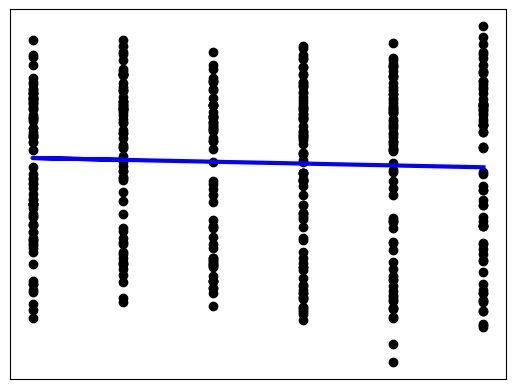

In [61]:
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, prediction, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [83]:
## setting date as index
df['DATE'] = pd.to_datetime(df[['Year', 'Month','Day']])
df = df.drop(columns=['Year', 'Month','Day'])
df.index = df["DATE"]
df.drop(columns=["DATE"],inplace = True)

KeyError: "None of [Index(['Year', 'Month', 'Day'], dtype='object')] are in the [columns]"

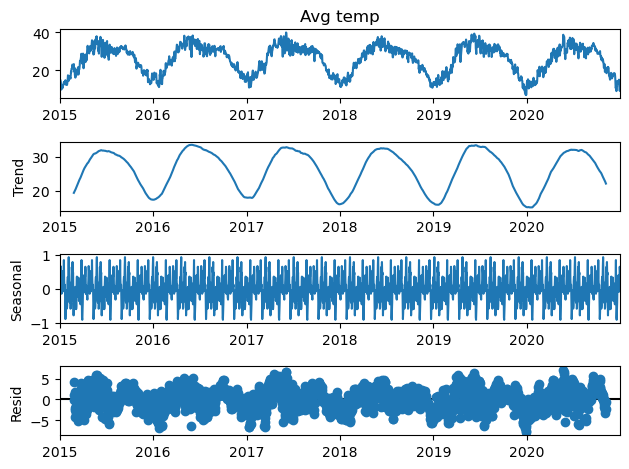

In [65]:
Temp = pd.DataFrame(df["Avg temp"])
add = seasonal_decompose(Temp["Avg temp"],model='add',period = 110)
add.plot();

<Axes: xlabel='DATE'>

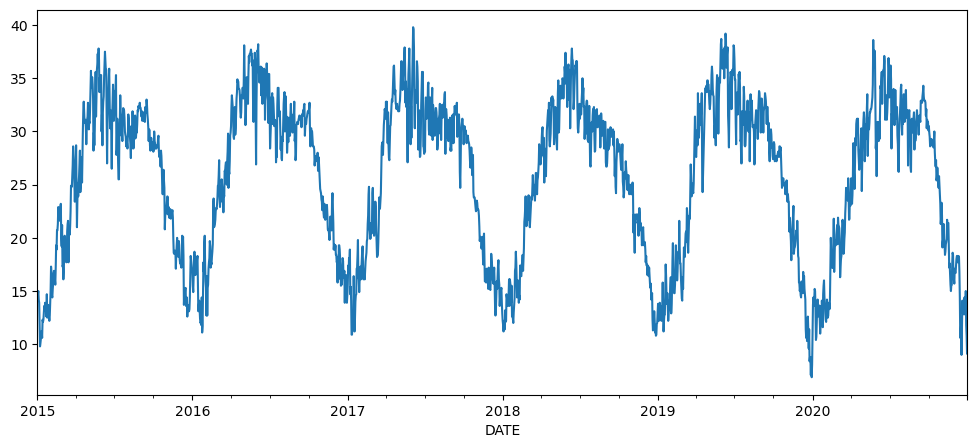

In [66]:
df['Avg temp'].plot(figsize=(12,5))

In [67]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

def ad_test(dataset):
    dftest = adfuller(dataset, autolag= 'AIC')
    print("1. ADF: ",dftest[0])
    print("2. P-value: ",dftest[1])
    print("3. Number of Lags: ",dftest[2])
    print("4. Number of observations used for ADF Regression and Critical Value Calculation: ",dftest[3])
    print("5. Critical Values: ")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

In [73]:
ad_test(df['Avg temp']) 

1. ADF:  -2.466437476935162
2. P-value:  0.12385543624219025
3. Number of Lags:  9
4. Number of observations used for ADF Regression and Critical Value Calculation:  2182
5. Critical Values: 
	 1% :  -3.4333504627066542
	 5% :  -2.8628655035890977
	 10% :  -2.567475631233297


In [74]:
ad_test(df['Avg temp'].diff()[1:]) #Differentiaion of the first order becacuse the p value was not <0.05

1. ADF:  -21.05406160939143
2. P-value:  0.0
3. Number of Lags:  8
4. Number of observations used for ADF Regression and Critical Value Calculation:  2182
5. Critical Values: 
	 1% :  -3.4333504627066542
	 5% :  -2.8628655035890977
	 10% :  -2.567475631233297


<Figure size 1200x600 with 0 Axes>

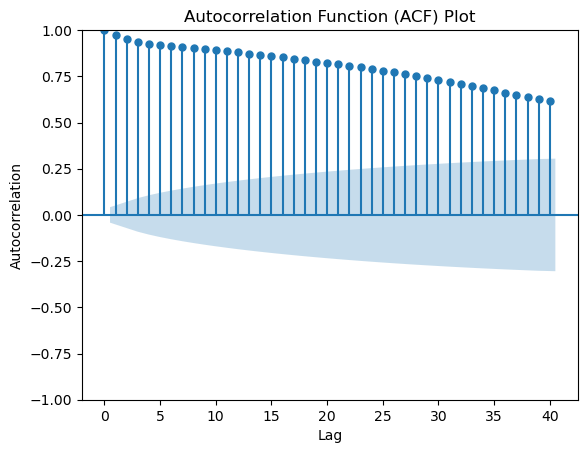

In [75]:
plt.figure(figsize=(12, 6))
plot_acf(df['Avg temp'], lags=40)  # You can adjust the number of lags as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [76]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [77]:
stepwise_fit = auto_arima(df['Avg temp'], seasonal=True, trace=True,
                         suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8106.694, Time=0.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14967.931, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8226.522, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12569.393, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20627.759, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8157.480, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8230.515, Time=0.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8102.974, Time=1.62 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=8104.358, Time=1.14 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=8105.051, Time=1.56 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8109.637, Time=0.89 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8106.272, Time=0.99 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=8104.555, Time=1.18 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8104.242, Time=1.81 sec
 ARIMA(3,0,2)(0,0,0)[0]       

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2192
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -4044.487
Date:                Fri, 21 Jun 2024   AIC                           8102.974
Time:                        13:14:43   BIC                           8142.821
Sample:                    01-01-2015   HQIC                          8117.537
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0299      0.013      2.290      0.022       0.004       0.055
ar.L1          2.3887      0.106     22.502      0.000       2.181       2.597
ar.L2         -1.9703      0.174    -11.339      0.000      -2.311      -1.630
ar.L3          0.5804      0.069      8.380      0.000       0.445       0.716
ma.L1         -1.5373      0.111    -13.898      0.000      -1.754      -1.320
ma.L2          0.6340      0.095      6.689      0.000       0.448       0.820
sigma2         2.3422      0.060     38.822      0.000       2.224       2.460
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):               294.98
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.58
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [79]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(2192, 5)
(2162, 5) (30, 5)


In [80]:
model=SARIMAX(train['Avg temp'],order=(3,0,2))
model=model.fit()
model.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53261D+02    |proj g|=  3.03241D+02

At iterate    5    f=  2.04474D+00    |proj g|=  3.60029D-01

At iterate   10    f=  1.88915D+00    |proj g|=  4.67591D-02


 This problem is unconstrained.



At iterate   15    f=  1.88078D+00    |proj g|=  2.26893D-03

At iterate   20    f=  1.88051D+00    |proj g|=  2.38090D-04

At iterate   25    f=  1.88050D+00    |proj g|=  3.35086D-03

At iterate   30    f=  1.88047D+00    |proj g|=  2.61394D-03

At iterate   35    f=  1.88046D+00    |proj g|=  6.55759D-05

At iterate   40    f=  1.87945D+00    |proj g|=  9.26633D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     51      1     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Avg temp   No. Observations:                 2162
Model:               SARIMAX(3, 0, 2)   Log Likelihood                   0.000
Date:                Fri, 21 Jun 2024   AIC                             12.000
Time:                        13:15:15   BIC                             46.073
Sample:                    01-01-2015   HQIC                            24.462
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   4.89e-06   2.05e+05      0.000       1.000       1.000
ar.L2          1.0000   2.95e-06   3.39e+05      0.000       1.000       1.000
ar.L3         -1.0000   3.89e-06  -2.57e+05      0.000      -1.000      -1.000
ma.L1      -3.983e-06         -0        inf      0.000   -3.98e-06   -3.98e-06
ma.L2         -1.0000         -0        inf      0.000      -1.000      -1.000
sigma2       105.5189         -0       -inf      0.000     105.519     105.519
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [81]:
start=len(train)
end=len(train)+len(test)-1
prediction=model.predict(start=start,end=end,typ='levels')
print(prediction)

2020-12-02    0.0
2020-12-03    0.0
2020-12-04    0.0
2020-12-05    0.0
2020-12-06    0.0
2020-12-07    0.0
2020-12-08    0.0
2020-12-09    0.0
2020-12-10    0.0
2020-12-11    0.0
2020-12-12    0.0
2020-12-13    0.0
2020-12-14    0.0
2020-12-15    0.0
2020-12-16    0.0
2020-12-17    0.0
2020-12-18    0.0
2020-12-19    0.0
2020-12-20    0.0
2020-12-21    0.0
2020-12-22    0.0
2020-12-23    0.0
2020-12-24    0.0
2020-12-25    0.0
2020-12-26    0.0
2020-12-27    0.0
2020-12-28    0.0
2020-12-29    0.0
2020-12-30    0.0
2020-12-31    0.0
Freq: D, Name: predicted_mean, dtype: float64


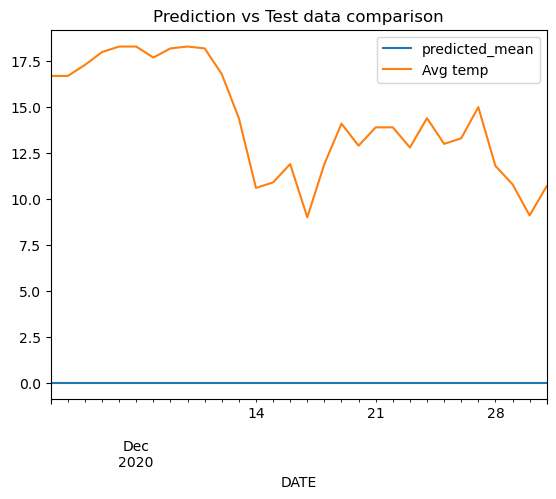

In [82]:
prediction.plot(legend=True)
test['Avg temp'].plot(legend=True)
plt.title("Prediction vs Test data comparison")
plt.show()